>>> ## Thyroid Disease Detection

## Step 1: Acquire 

### Step 1.a: Explore Problem
    
##### Problem is to detect Thyroid Disease.<br>

   
### Step 1.b: download data from UCI repository of machine learning

##### Thyroid Disease dataset are availble in <a href = 'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/'>UCI Repository.</a> website .
 

### Step 1.c: About Data 

    [Thyroid disease records supplied by the Garavan Institute and J. Ross
    Quinlan, New South Wales Institute, Syndney, Australia.1987.]
    

    classes: increased binding protein, decreased binding protein,negative.			

    age:                                                       continuous.
    sex:				                                         M, F.
    on thyroxine:			                                     f, t.
    query on thyroxine:		                                     f, t.
    on antithyroid medication:	                                 f, t.
    sick:				                                         f, t.
    pregnant:			                                         f, t.
    thyroid surgery:		                                     f, t.
    I131 treatment:			                                     f, t.
    query hypothyroid:		                                     f, t.
    query hyperthyroid:		                                     f, t.
    lithium:			                                         f, t.
    goitre:				                                         f, t.
    tumor:				                                         f, t.
    hypopituitary:			                                     f, t.
    psych:				                                         f, t.
    TSH measured:			                                     f, t.
    TSH:(Thyroid stimulating hormone)				             continuous.
    T3 measured:			                                     f, t.
    T3:				                                             continuous.
    TT4 measured:			                                     f, t.
    TT4:				                                         continuous.
    T4U measured:			                                     f, t.
    T4U:(Thyroxine utilization rate)				             continuous.
    FTI measured:			                                     f, t.
    FTI:				                                         continuous.
    TBG measured:			                                     f, t.
    TBG:				                                         continuous.
    referral source:		                                     WEST, STMW, SVHC, SVI, SVHD, other.

    
 `Thyroid-binding globulin (TBG) is produced in the liver and is a circulating protein that reversibly binds to thyroid hormones 3,5,3’-triiodothyronine (T3) and thyroxine (T4) and carries them in the bloodstream.`
 
 
         `FTI(Free Thyroxine Index) = Thyroxine (T4) / Thyroid binding capacity.`
         `T4U = Thyroxine utilization rate`
         `TSH = Thyroid stimulating hormone`
         `TT4 = Total Thyroxine` 
         `TT3 = Total Triiodothyronine`
         `T4 = Thyroxine` 
         `T3 = Triiodothyronine`
         `f = False (0)`
         `t = True(1)`
         `M = Male`
         `F = Female`
         
                
### About Thyroid Classes 
 
 * `Increased binding protein` - `Hypothyroidism`
     
         Increased TBG levels may be due to hypothyroidism, liver disease, and pregnancy. In cases of high TBG, more thyroid hormone will be bound, decreasing free hormone in the blood.
 
 * `Decreased binding protein` - `Hyperthyroidism`
 
         Decreased TBG levels may also be due to hyperthyroidism, renal disease, liver disease, severe systemic illness, Cushing syndrome, medications, and malnutrition. If TBG levels are low, total thyroid levels will be low and free thyroid hormone levels may be normal or low.
     
 * `Negative - No Thyroid`
 


### Step 1.d: Importing  Libaries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
name_path = r'Data/allbp_names.csv'
data_path = r'Data/allbp_data.csv'
test_path = r'Data/allbp_test.csv'

In [4]:
df = pd.read_csv(name_path)
df.head(20)

,;,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,; Thyroid disease records supplied by the Gara...,NaN,NaN,NaN,NaN,NaN
1,; Quinlan,New South Wales Institute,Syndney,Australia.,NaN,NaN
2,;,NaN,NaN,NaN,NaN,NaN
3,; 1987.,NaN,NaN,NaN,NaN,NaN
4,;,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,increased binding protein,decreased binding protein,NaN,NaN,NaN,NaN
7,negative.\t\t\t| classes,NaN,NaN,NaN,NaN,NaN
8,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN
9,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(29)

,;,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN
10,sex:\t\t\t\tM,F.,NaN,NaN,NaN,NaN
11,on thyroxine:\t\t\tf,t.,NaN,NaN,NaN,NaN
12,query on thyroxine:\t\tf,t.,NaN,NaN,NaN,NaN
13,on antithyroid medication:\tf,t.,NaN,NaN,NaN,NaN
14,sick:\t\t\t\tf,t.,NaN,NaN,NaN,NaN
15,pregnant:\t\t\tf,t.,NaN,NaN,NaN,NaN
16,thyroid surgery:\t\tf,t.,NaN,NaN,NaN,NaN
17,I131 treatment:\t\t\tf,t.,NaN,NaN,NaN,NaN
18,query hypothyroid:\t\tf,t.,NaN,NaN,NaN,NaN


In [6]:
name_df = pd.read_csv(name_path,skiprows=9,on_bad_lines='skip')
name_df.head()

,age:\t\t\t\tcontinuous.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN
1,sex:\t\t\t\tM,F.,NaN,NaN,NaN,NaN
2,on thyroxine:\t\t\tf,t.,NaN,NaN,NaN,NaN
3,query on thyroxine:\t\tf,t.,NaN,NaN,NaN,NaN
4,on antithyroid medication:\tf,t.,NaN,NaN,NaN,NaN


In [8]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age:				continuous.  29 non-null     object
 1   Unnamed: 1           22 non-null     object
 2   Unnamed: 2           1 non-null      object
 3   Unnamed: 3           1 non-null      object
 4   Unnamed: 4           1 non-null      object
 5   Unnamed: 5           1 non-null      object
dtypes: object(6)
memory usage: 1.5+ KB


In [6]:
name_df.shape

(29, 6)

In [7]:
name_df.dropna(axis=1,how='any',inplace=True)

In [8]:
name_df.head(2)

,age:\t\t\t\tcontinuous.
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [9]:
name_df.columns = ['name']

In [10]:
name_df.head(2)

,name
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [13]:
name_df.shape

(29, 1)

In [14]:
Column_name =[i[0] for i in name_df['name'].str.split(':')]
# i am extracting the column names from this names file

In [15]:
Column_name           # i got all column names

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source']

In [16]:
Column_name.append('Classes')      # now i am adding extra one feature name, which is dependent feature


In [17]:
Column_name

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source',
 'Classes']

In [11]:
len(Column_name)

30

### # now i am reading data file

In [18]:


data_df = pd.read_csv(data_path)
data_df.head()

,41,F,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,f.11,f.12,f.13,t,1.3,t.1,2.5,t.2,125,t.3,1.14,t.4,109,f.14,?,SVHC,negative.|3733
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434


In [19]:
data_df.shape

(2799, 30)

In [19]:
data_df.columns = Column_name

In [20]:
data_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434


In [13]:
data_df.shape

(2800, 30)

### loading testing data file

In [21]:
test_df = pd.read_csv(test_path,names=Column_name,index_col=False)
test_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.5,t,2.5,t,108,t,0.96,t,113,f,?,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.6,t,2.4,t,61,t,0.82,t,75,f,?,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141,f,?,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,1.3,t,120,t,0.84,t,143,f,?,SVI,negative.|487


In [15]:
test_df.shape

(972, 30)

### concatenating both training data and testing data

In [22]:
data = pd.concat([data_df,test_df],ignore_index=True)

In [23]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434


In [24]:
data.info()
# as we can see there is all features are object data types and not null any of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3771 non-null   object
 2   on thyroxine               3771 non-null   object
 3   query on thyroxine         3771 non-null   object
 4   on antithyroid medication  3771 non-null   object
 5   sick                       3771 non-null   object
 6   pregnant                   3771 non-null   object
 7   thyroid surgery            3771 non-null   object
 8   I131 treatment             3771 non-null   object
 9   query hypothyroid          3771 non-null   object
 10  query hyperthyroid         3771 non-null   object
 11  lithium                    3771 non-null   object
 12  goitre                     3771 non-null   object
 13  tumor                      3771 non-null   object
 14  hypopitu

### exploratory data analysis

In [28]:
len(data) ,data.shape

(3771, (3771, 30))

In [25]:
data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

### to check the null value, there is instead of null value, this data exist this symbol " ? "

In [26]:
data.isnull().sum().sum()

0

In [27]:
data[data['age'] =='?']['age'].count()
# there is one question mark sign which, there is singal null value

1

In [28]:
# checking '?' or null value in 'sex'

data[data['sex'] =='?']['sex'].count()

150

In [29]:
data.isin(['?']).sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3771
referral source                 0
Classes       

In [30]:
# now replacing all " ? " to None in entire dataframe

data =data.apply(lambda x : x.replace('?',np.nan))

In [31]:
# counting the null values in each columns
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3771
referral source                 0
Classes       

### null values in percentage

In [32]:
round(data.isna().sum()/data.shape[0]*100)

age                            0.0
sex                            4.0
on thyroxine                   0.0
query on thyroxine             0.0
on antithyroid medication      0.0
sick                           0.0
pregnant                       0.0
thyroid surgery                0.0
I131 treatment                 0.0
query hypothyroid              0.0
query hyperthyroid             0.0
lithium                        0.0
goitre                         0.0
tumor                          0.0
hypopituitary                  0.0
psych                          0.0
TSH measured                   0.0
TSH                           10.0
T3 measured                    0.0
T3                            20.0
TT4 measured                   0.0
TT4                            6.0
T4U measured                   0.0
T4U                           10.0
FTI measured                   0.0
FTI                           10.0
TBG measured                   0.0
TBG                          100.0
referral source     

In [70]:
# name of grater than 20% none value contained feature
greater_than20 = round(data.isna().sum()/data.shape[0]*100)[round(data.isna().sum()/data.shape[0]*100)>20].keys()
list(greater_than20)

['TBG']

<AxesSubplot:>

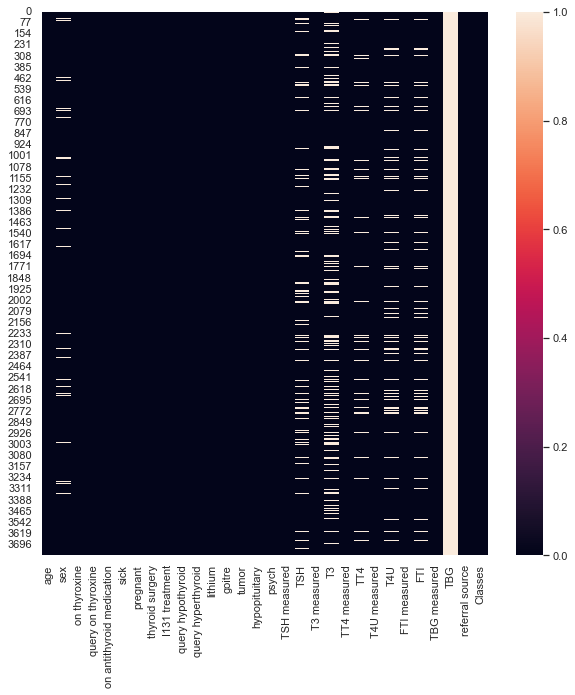

In [34]:
# heatmap to visualize the np.nan value
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.isnull())

In [39]:
data['TBG measured'].value_counts()

f    3771
Name: TBG measured, dtype: int64

In [44]:
data.shape[0]

3771

In [32]:
# i will remove all these columns in feature selection process
unnecessary_column = data.isin(['f']).sum()[data.isin(['f']).sum()>3000].keys()
unnecessary_column

Index(['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
       'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'TBG measured'],
      dtype='object')

# Feature  Engineering

In [71]:
list(greater_than20)

['TBG']

In [33]:
# Drop referral source column and 'TBG measured' carry 0 in all 'TBG' as  carry Null 

data.drop(columns=['referral source','TBG measured', 'TBG'],inplace=True)

In [55]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'Classes'],
      dtype='object')

In [59]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,t,102,f,NaN,f,NaN,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,t,109,t,0.91,t,120,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,t,175,f,NaN,f,NaN,negative.|806
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,t,61,t,0.87,t,70,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,t,183,t,1.3,t,141,negative.|3434


In [37]:
numeric.dtypes

age    object
TSH    object
T3     object
TT4    object
T4U    object
FTI    object
dtype: object

In [38]:
# to converting the data types object ot float64
data[['age','TSH','T3','TT4','T4U','FTI']] = data[['age','TSH','T3','TT4','T4U','FTI']].astype('float64')

In [42]:
# Numeric Feature list
numeric = data[['age','TSH','T3','TT4','T4U','FTI']]
numeric.head()

,age,TSH,T3,TT4,T4U,FTI
0,23.0,4.10,2.0,102.0,NaN,NaN
1,46.0,0.98,NaN,109.0,0.91,120.0
2,70.0,0.16,1.9,175.0,NaN,NaN
3,70.0,0.72,1.2,61.0,0.87,70.0
4,18.0,0.03,NaN,183.0,1.30,141.0


In [43]:
numeric.dtypes            # all are numerical columns

age    float64
TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object

In [45]:
num_col = ['age','TSH','T3','TT4','T4U','FTI']

In [46]:
# Categorical Feature list

categorical = [col for col in data.columns if col not in num_col]
len(categorical)

21

### to cleaning the classes featrue

In [48]:
data[['Classes']].head()

,Classes
0,negative.|1442
1,negative.|2965
2,negative.|806
3,negative.|2807
4,negative.|3434


In [53]:
data['Classes'][0]

'negative.|1442'

In [49]:
data['Classes'][0].find('.')

8

In [48]:
data['Classes'][0][0:8]

'negative'

In [51]:
data['Classes'][0].find('.')


8

In [52]:
data['Classes'][0][0:data['Classes'][0].find('.')]

# we can get class name for this

'negative'

In [49]:
# adding a new label feature from the classes feature
data['labels'] = data['Classes'].apply(lambda x : x[:x.find(".")])

In [50]:
# adding a new continues_target feature from the classes feature
data['continues_target'] = data['Classes'].apply(lambda x : x[x.find("|")+1:])

In [55]:
data[['Classes','continues_target','labels']].head()

,Classes,continues_target,labels
0,negative.|1442,1442,negative
1,negative.|2965,2965,negative
2,negative.|806,806,negative
3,negative.|2807,2807,negative
4,negative.|3434,3434,negative


In [60]:
data['Classes'].value_counts()

negative                     3608
increased binding protein     149
decreased binding protein      14
Name: Classes, dtype: int64

In [57]:
# changing the datatypes of new feature into numerical
data['continues_target'] = data['continues_target'].astype('int')

### data distribution of continues_target in Negative class

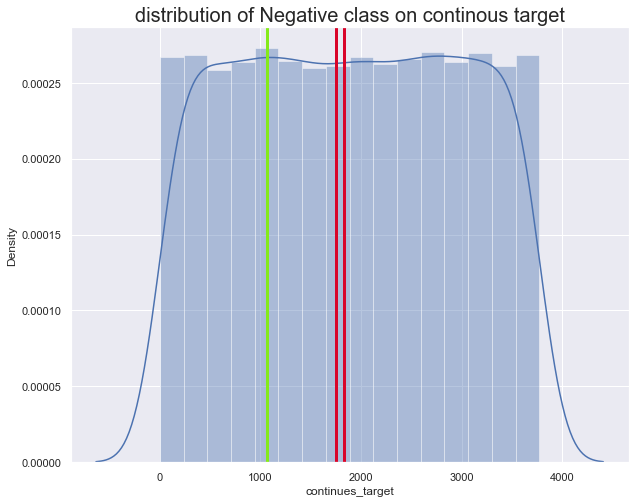

In [123]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(data[data['labels']=='negative']['continues_target'])
plt.title('distribution of Negative class on continous target',fontdict={'fontsize':20})
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].mean(),color='#d90429',linewidth=3)
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].median(),color='#d90429',linewidth=3)
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].std(),color='#85EA1A',linewidth=3)
plt.show()

### distribution of increased binding protein class on continous target

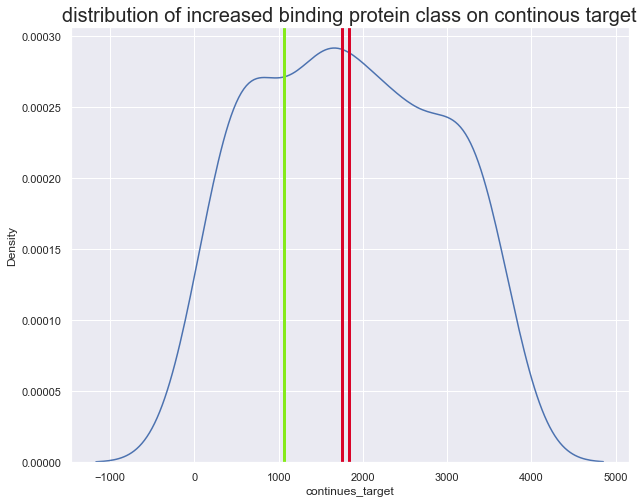

In [122]:
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(data[data['labels']=='increased binding protein']['continues_target'])
plt.title('distribution of increased binding protein class on continous target',fontdict={'fontsize':20})
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].median(),color='#d90429',linewidth=3)
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].mean(),color='#d90429',linewidth=3)
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].std(),color='#85EA1A',linewidth=3)
plt.show()

### distribution of decreased binding protein class on continous target

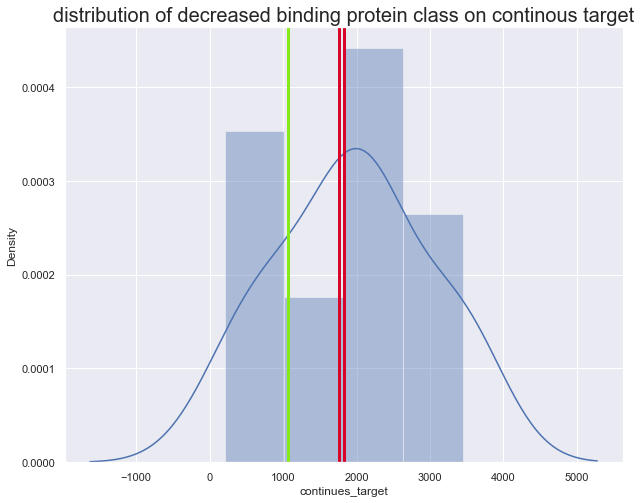

In [121]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(data[data['labels']=='decreased binding protein']['continues_target'])
plt.title('distribution of decreased binding protein class on continous target',fontdict={'fontsize':20})
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].mean(),color='#d90429',linewidth=3)
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].median(),color='#d90429',linewidth=3)
plt.axvline(data[data['labels']=='increased binding protein']['continues_target'].std(),color='#85EA1A',linewidth=3)
plt.show()

### labels feature encoding
'negative':----'Negative'<br>
'increased binding protein':----'Hypothyroidism'<br>
'decreased binding protein':-----'Hyperthyroidism'

In [59]:
# changing Value Name in Classes

data['labels']= data['labels'].map({'negative':'Negative','increased binding protein':'Hypothyroidism','decreased binding protein':'Hyperthyroidism'})

In [60]:
data['labels'].value_counts()

Negative           3608
Hypothyroidism      149
Hyperthyroidism      14
Name: labels, dtype: int64

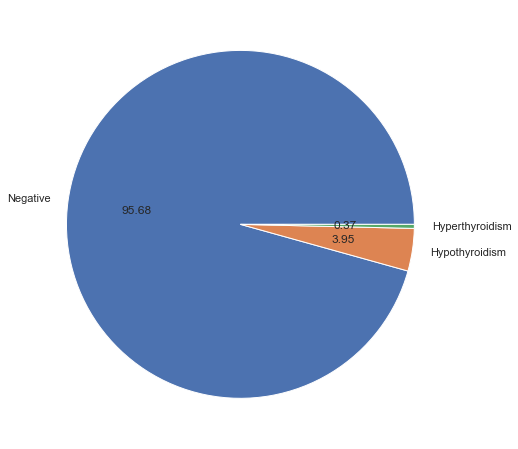

In [62]:
plt.figure(facecolor="white",figsize=(8,8))
sns.set(rc={'figure.figsize':(10,8)})
plt.pie(data['labels'].value_counts(),autopct='%0.2f',labels=data['labels'].value_counts().keys())
plt.show()
# this is imbalanced dataset

## Missing value imputation

In [63]:
numeric = data.select_dtypes(exclude='O')
categorical = data.select_dtypes(include='O')

## First Deal with Numerical Features

In [64]:
# Cheacking Numerical Feature null 

numeric.isnull().sum()

age                   1
TSH                 369
T3                  769
TT4                 231
T4U                 387
FTI                 385
continues_target      0
dtype: int64

In [65]:
data[data['age'].isna()==True]

# Female  has the age Null value so Fill Null with Female Mean Value

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes,labels,continues_target
1984,NaN,F,t,f,f,f,f,f,t,f,f,f,f,f,f,f,t,0.6,t,1.5,t,120.0,t,0.82,t,146.0,negative.|1,Negative,1


In [42]:
# Remove Null Value in Numerical Column
data['sex'].value_counts()

# Female has more count than Male

F    2480
M    1142
Name: sex, dtype: int64

In [71]:
negative_age_mean = round(data[data['labels']=='Negative']['age'].mean())
negative_age_mean

52

In [74]:
# Replace Null with  mean of Negative class age 

numeric['age'] = numeric['age'].fillna(female_age_mean)

In [77]:
numeric.isnull().sum()[[0]]          # age feature handled

age    0
dtype: int64

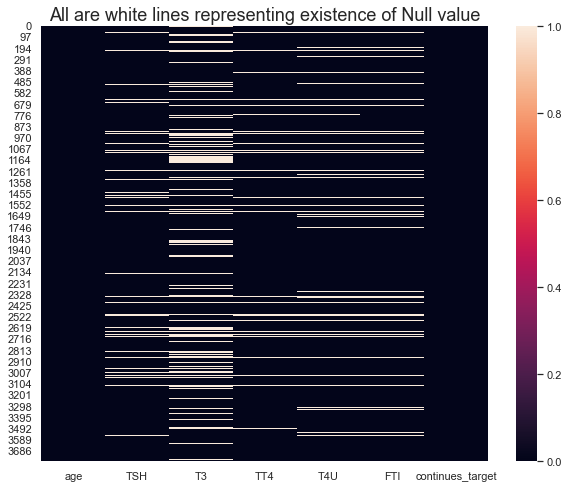

In [82]:
sns.heatmap(numeric.isnull())
plt.title('All are white lines representing existence of Null value',fontdict={'fontsize':18})
plt.show()

In [94]:
pd.set_option('display.max_rows',None)

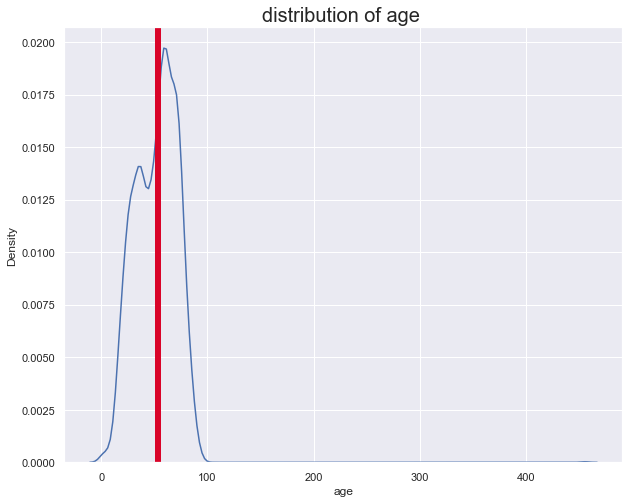

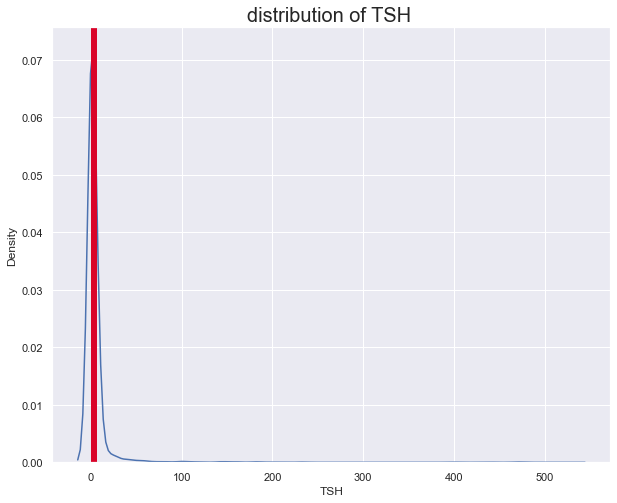

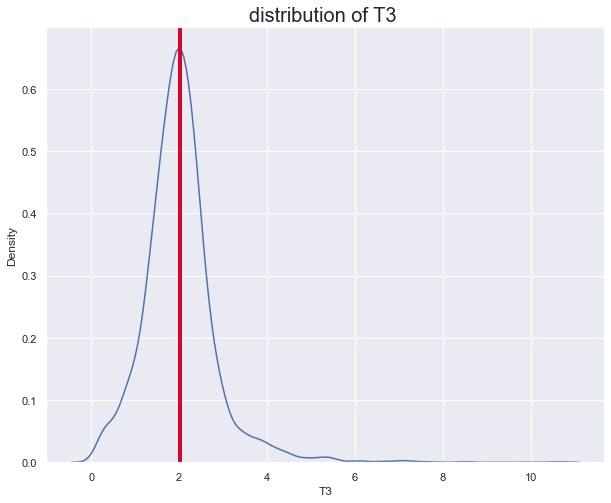

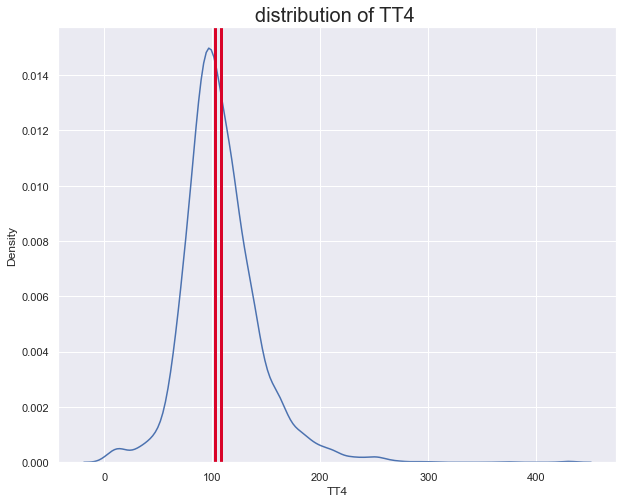

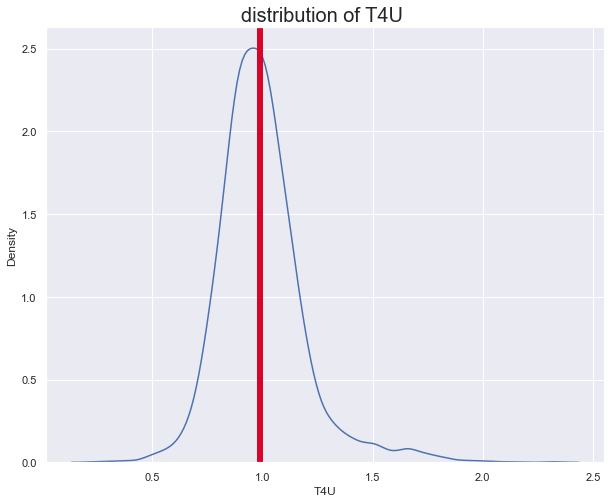

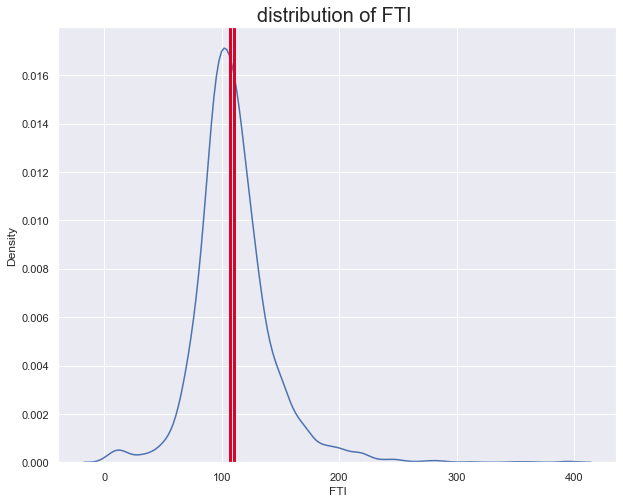

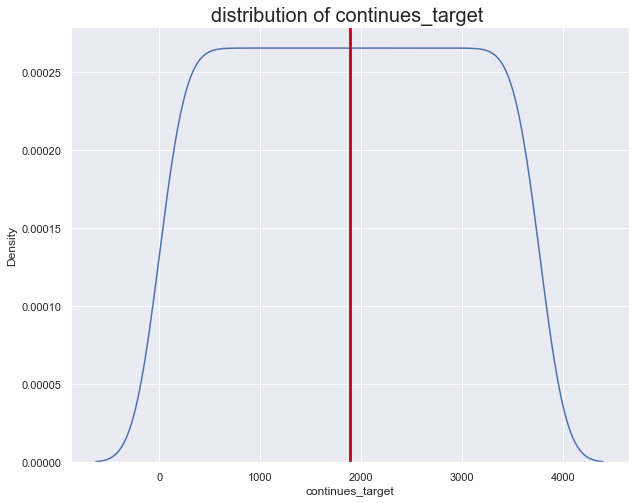

In [98]:
## all are numeric feature Normaly distributed
for i ,col in enumerate(numeric.columns):
#     plt.subplot(3,3,i+1)
    sns.kdeplot(numeric[col])
    plt.title(f"distribution of {col} ",fontdict={'fontsize':20})
    plt.axvline(numeric[col].mean(),color='#d90429',linewidth=3)
    plt.axvline(numeric[col].median(),color='#d90429',linewidth=3)
#     plt.axvline(numeric[col].std(),color='#d90429',linewidth=3)
    plt.show()


### simpleImputer filling the mean value in numerica column, because we have seen the distribution of feature

In [99]:
numeric.head()

,age,TSH,T3,TT4,T4U,FTI,continues_target
0,23.0,4.10,2.0,102.0,NaN,NaN,1442
1,46.0,0.98,NaN,109.0,0.91,120.0,2965
2,70.0,0.16,1.9,175.0,NaN,NaN,806
3,70.0,0.72,1.2,61.0,0.87,70.0,2807
4,18.0,0.03,NaN,183.0,1.30,141.0,3434


In [100]:
numeric.isnull().sum().sum()

2141

In [101]:
# imputing the messing value by the mean
mean_imputer = SimpleImputer(strategy='mean')
numeric = mean_imputer.fit_transform(numeric)

In [152]:
joblib.dump(mean_imputer,'models/preprocess_Model/mean_imputer.lb')         # save the imputer model

['models/preprocess_Model/mean_imputer.lb']

In [112]:
numeric = pd.DataFrame(numeric)
numeric.head(2)

,0,1,2,3,4,5,6
0,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0


In [114]:
numeric.columns=['age','TSH','T3','TT4','T4U','FTI','continues_target']

In [115]:
numeric.head(2)

,age,TSH,T3,TT4,T4U,FTI,continues_target
0,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0


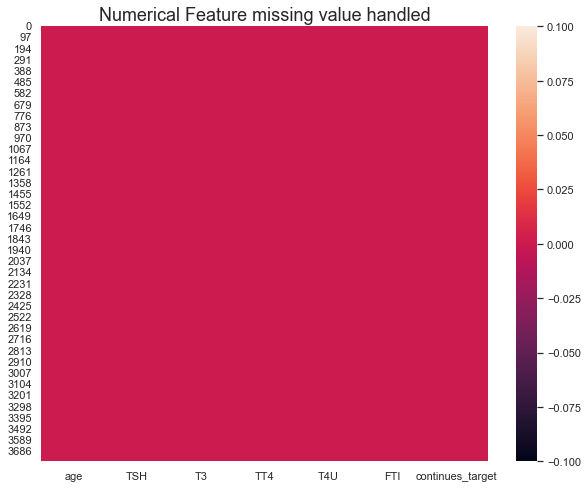

In [118]:
sns.heatmap(numeric.isnull())
plt.title('Numerical Feature missing value handled',fontdict={'fontsize':18})
plt.show()

## Deal with categorical features

In [120]:
categorical.head(2)


,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,Classes,labels
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,negative.|1442,Negative
1,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,negative.|2965,Negative


In [122]:
# removed classes feature bcoz we have cleaned this feature and extracted usefull information
categorical = categorical.drop(['Classes'],axis=1)
categorical.head(2)

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative
1,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative


In [123]:
categorical.isnull().sum()          # only sex feature has missing values

sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
T3 measured                    0
TT4 measured                   0
T4U measured                   0
FTI measured                   0
labels                         0
dtype: int64

In [140]:
# fill sex null value with most frequent (mode)

imputer_mode = SimpleImputer(strategy='most_frequent')
categorical[['sex']] = imputer_mode.fit_transform(categorical[['sex']])

In [141]:
categorical.isnull().sum()              ### missing value in categorical columns handled

sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
T3 measured                  0
TT4 measured                 0
T4U measured                 0
FTI measured                 0
labels                       0
dtype: int64

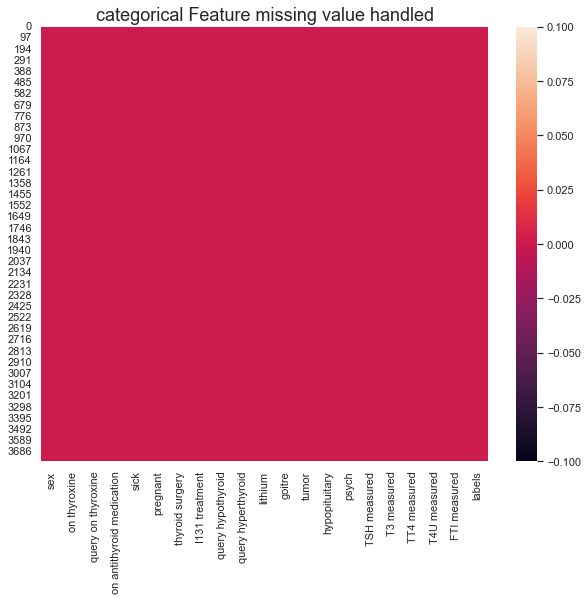

In [142]:
sns.heatmap(categorical.isnull())
plt.title('categorical Feature missing value handled',fontdict={'fontsize':18})
plt.show()

In [145]:
cleaned_data = pd.concat([categorical,numeric],axis=1)
cleaned_data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels,age,TSH,T3,TT4,T4U,FTI,continues_target
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0
2,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative,70.0,0.16,1.900000,175.0,0.994957,110.470083,806.0
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative,70.0,0.72,1.200000,61.0,0.870000,70.000000,2807.0
4,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative,18.0,0.03,2.013338,183.0,1.300000,141.000000,3434.0


In [146]:
cleaned_data.isnull().sum().sum()            # now you can see i have no missing value


0

In [148]:
cleaned_data.to_csv('Data/cleaned_data.csv')                # save the cleaned data file

In [2]:
cleaned_data = pd.read_csv('Data/cleaned_data.csv')
cleaned_data.head()

,Unnamed: 0,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U measured,FTI measured,labels,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,F,f,f,f,f,f,f,f,f,...,f,f,Negative,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,1,M,f,f,f,f,f,f,f,f,...,t,t,Negative,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0
2,2,F,t,f,f,f,f,f,f,f,...,f,f,Negative,70.0,0.16,1.900000,175.0,0.994957,110.470083,806.0
3,3,F,f,f,f,f,f,f,f,f,...,t,t,Negative,70.0,0.72,1.200000,61.0,0.870000,70.000000,2807.0
4,4,F,t,f,f,f,f,f,f,f,...,t,t,Negative,18.0,0.03,2.013338,183.0,1.300000,141.000000,3434.0


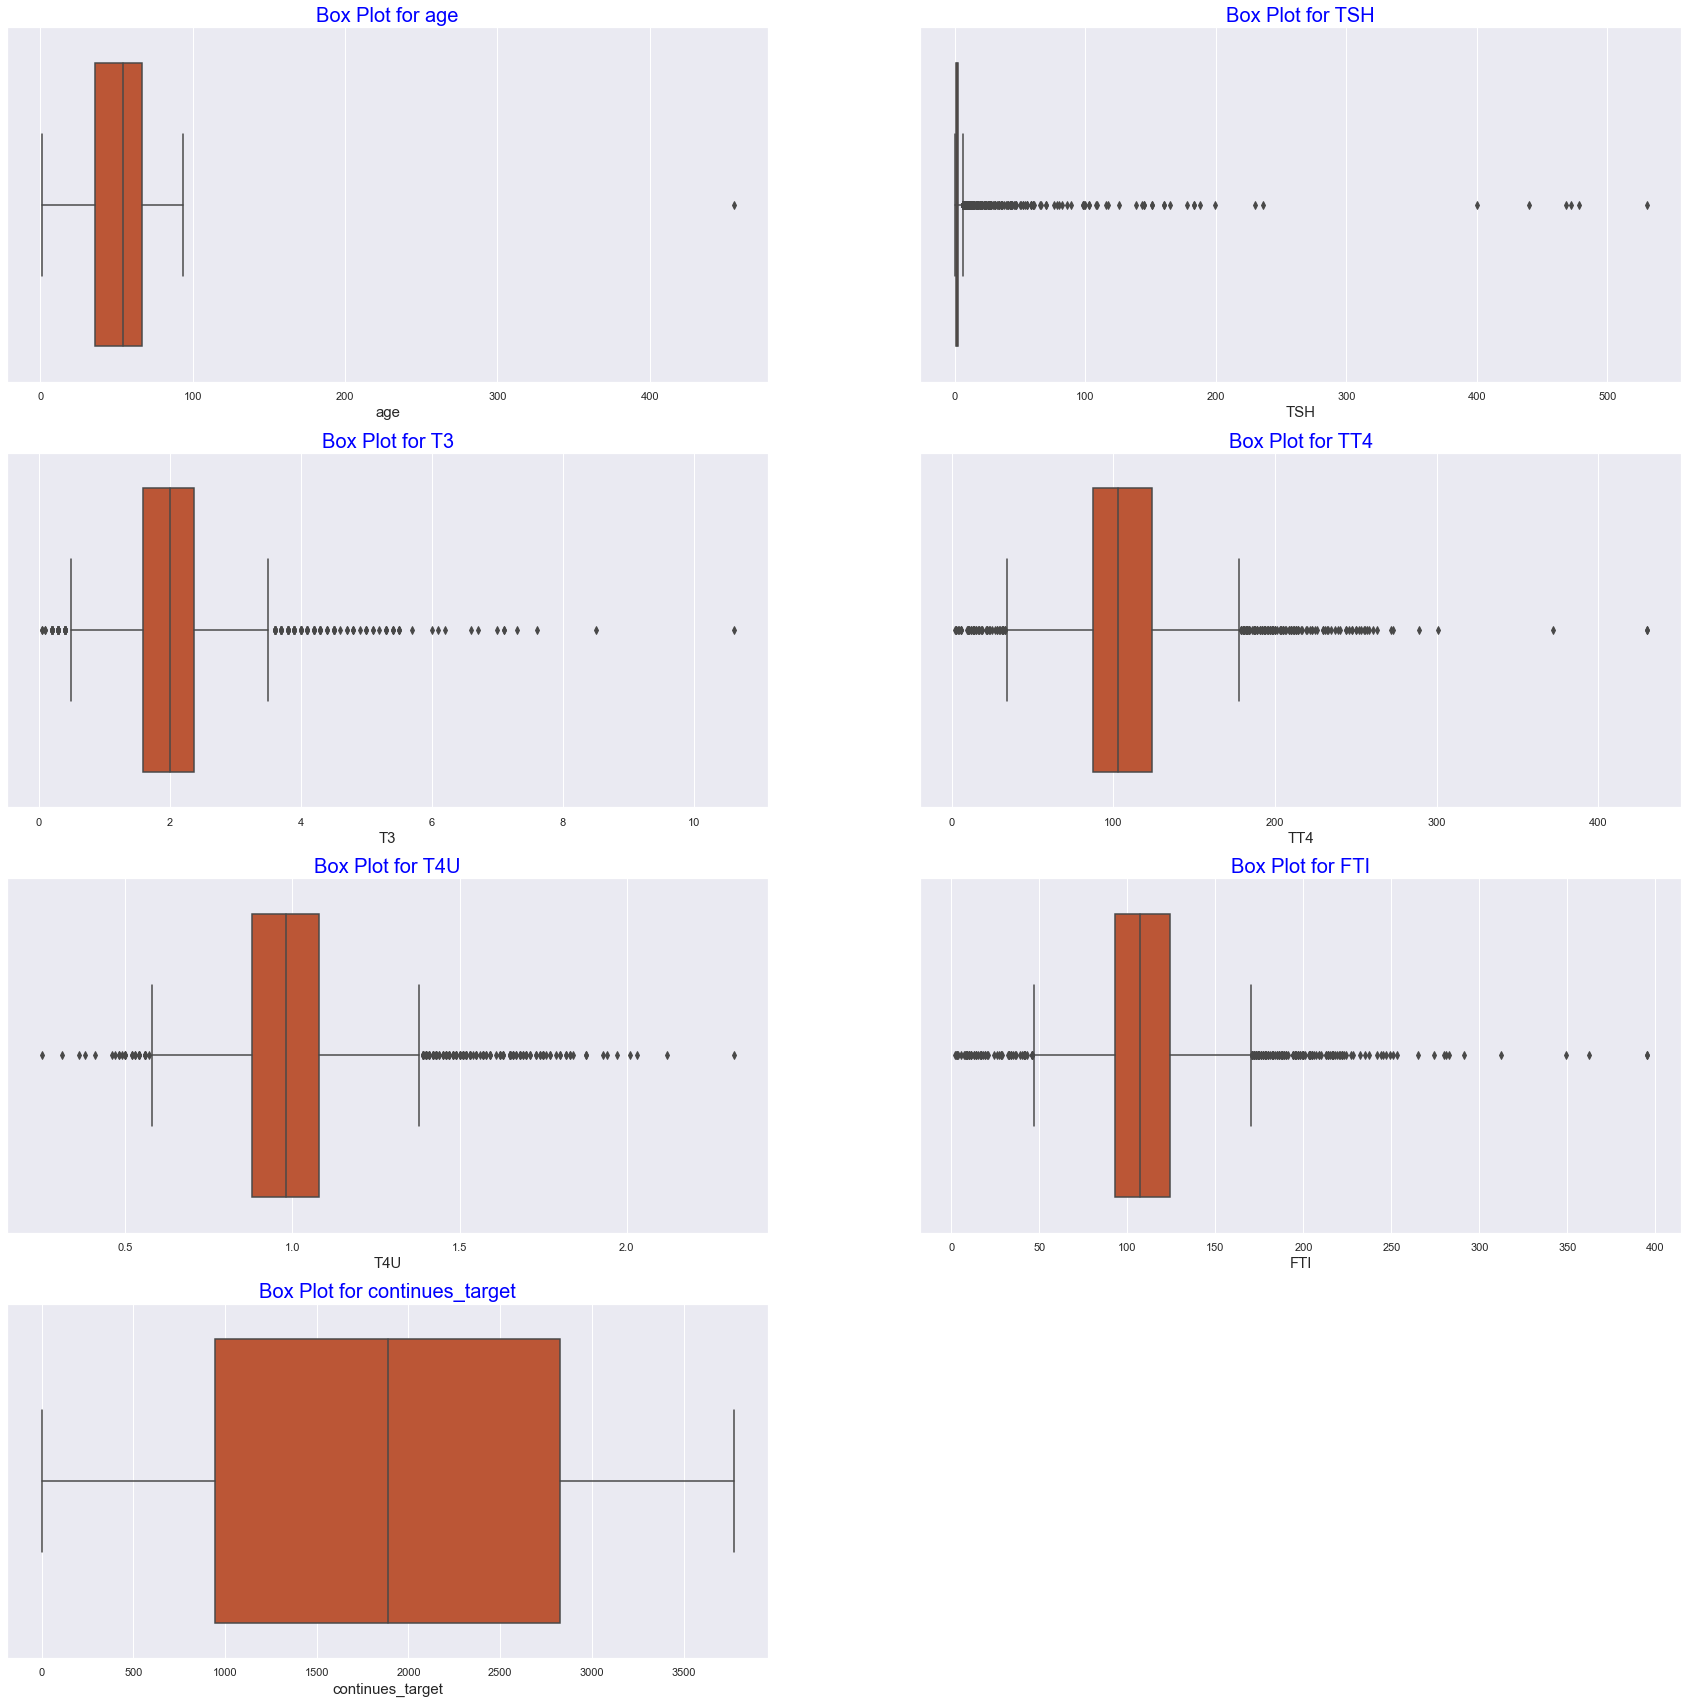

In [157]:
plt.figure(figsize=(30,30))
for row,col in enumerate(numeric.columns):
    plt.subplot(4,2,row+1)
    sns.boxplot(data[col],color='#d14A20')
    plt.title("Box Plot for "+col,fontsize=20,color='Blue')
    plt.xlabel(col,fontsize=15)

In [3]:
# need to remove Outlier from Age no one has 455 age
cleaned_data['age'].describe()

count    3771.000000
mean       51.738796
std        20.084198
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64

In [4]:
limit = cleaned_data['age'].quantile(.98)
limit

84.0

In [5]:
cleaned_data = cleaned_data[cleaned_data['age']<limit]       # removed the outlier from age

In [6]:
cleaned_data['age'].describe()

count    3682.000000
mean       50.793862
std        18.403227
min         1.000000
25%        36.000000
50%        54.000000
75%        66.000000
max        83.000000
Name: age, dtype: float64

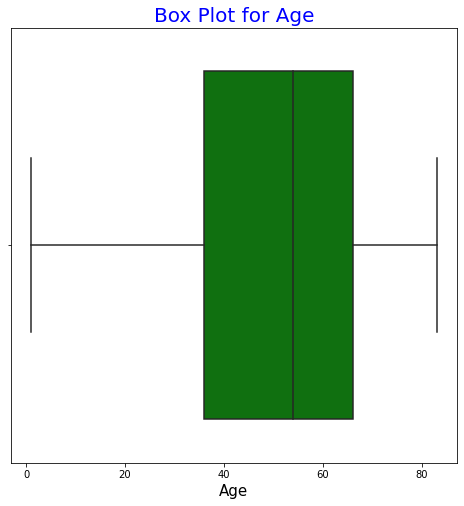

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(cleaned_data['age'],color='g')
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

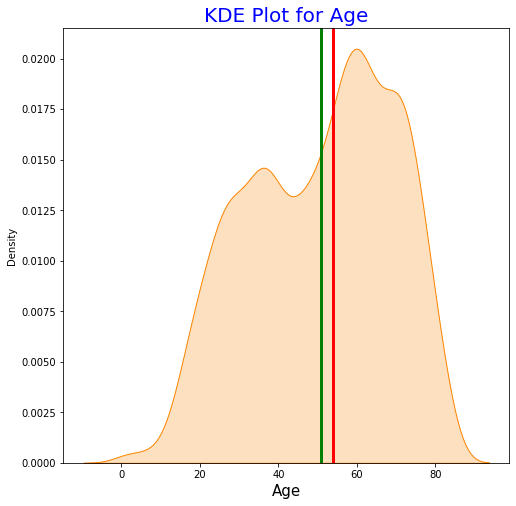

In [13]:
plt.figure(figsize=(8,8))
sns.kdeplot(cleaned_data['age'],color='#fb8500',shade=True)
plt.axvline(cleaned_data['age'].mean(),color='g',linewidth=3)
plt.axvline(cleaned_data['age'].median(),color='r',linewidth=3)
plt.
plt.title("KDE Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

In [14]:
cleaned_data.describe()

,Unnamed: 0,age,TSH,T3,TT4,T4U,FTI,continues_target
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,1883.263987,50.793862,5.133005,2.021478,108.265948,0.996010,110.308219,1890.479359
std,1087.883527,18.403227,23.557731,0.738638,34.529331,0.185376,31.275882,1090.220494
min,0.000000,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,1.000000
25%,942.250000,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000,945.250000
50%,1882.500000,54.000000,1.600000,2.013338,106.000000,0.994957,110.000000,1892.500000
75%,2824.750000,66.000000,3.800000,2.300000,122.750000,1.070000,121.000000,2832.750000
max,3770.000000,83.000000,530.000000,10.600000,430.000000,2.320000,395.000000,3772.000000


## Labelized & Scaling  Feature

In [15]:
cleaned_data.head()

,Unnamed: 0,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U measured,FTI measured,labels,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,F,f,f,f,f,f,f,f,f,...,f,f,Negative,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,1,M,f,f,f,f,f,f,f,f,...,t,t,Negative,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0
2,2,F,t,f,f,f,f,f,f,f,...,f,f,Negative,70.0,0.16,1.900000,175.0,0.994957,110.470083,806.0
3,3,F,f,f,f,f,f,f,f,f,...,t,t,Negative,70.0,0.72,1.200000,61.0,0.870000,70.000000,2807.0
4,4,F,t,f,f,f,f,f,f,f,...,t,t,Negative,18.0,0.03,2.013338,183.0,1.300000,141.000000,3434.0


In [73]:
data_scale =new_data.copy(deep=True)

## label encoding to the categorical features

In [18]:
categorical_data  =  cleaned_data.select_dtypes(include='O')
categorical_data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,f,f,Negative
1,M,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,t,t,t,Negative
2,F,t,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,f,f,Negative
3,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,t,Negative
4,F,t,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,t,t,t,Negative


In [19]:
numerical_data  =  cleaned_data.select_dtypes(exclude='O')
numerical_data.head()

,Unnamed: 0,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,1,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0
2,2,70.0,0.16,1.900000,175.0,0.994957,110.470083,806.0
3,3,70.0,0.72,1.200000,61.0,0.870000,70.000000,2807.0
4,4,18.0,0.03,2.013338,183.0,1.300000,141.000000,3434.0


In [21]:
cat_col = categorical_data.columns

In [23]:
cat_col = list(cat_col)
cat_col

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'labels']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
# Labelized Categorical Feature

cleaned_data[cat_col]=cleaned_data[cat_col].apply(le.fit_transform)

In [25]:
cleaned_data[cat_col].head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,2
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,2


In [26]:
joblib.dump(le,'models/label_encoder.lb')            # save the labelencoder

['models/label_encoder.lb']

In [28]:
categorical_data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,f,f,Negative
1,M,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,t,t,t,Negative
2,F,t,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,f,f,Negative
3,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,t,Negative
4,F,t,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,t,t,t,Negative


In [29]:
categorical_data['labels'].value_counts()

Negative           3520
Hypothyroidism      149
Hyperthyroidism      13
Name: labels, dtype: int64

In [30]:
cleaned_data['labels'].value_counts()

2    3520
1     149
0      13
Name: labels, dtype: int64

## labels feature
Negative --->   2 <br>
Hypothyroidism ----> 1  <br>
Hyperthyroidism  ----> 0  <br>
## sex feature
Female  ---->   0 <br>
male   ----->   1

###  Numerical Feature scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [33]:
numerical_data.head(2)

,Unnamed: 0,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,23.0,4.10,2.000000,102.0,0.994957,110.470083,1442.0
1,1,46.0,0.98,2.013338,109.0,0.910000,120.000000,2965.0


In [37]:
num_col = list(numerical_data.drop(['continues_target','Unnamed: 0'],axis=1).keys())
num_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

<AxesSubplot:>

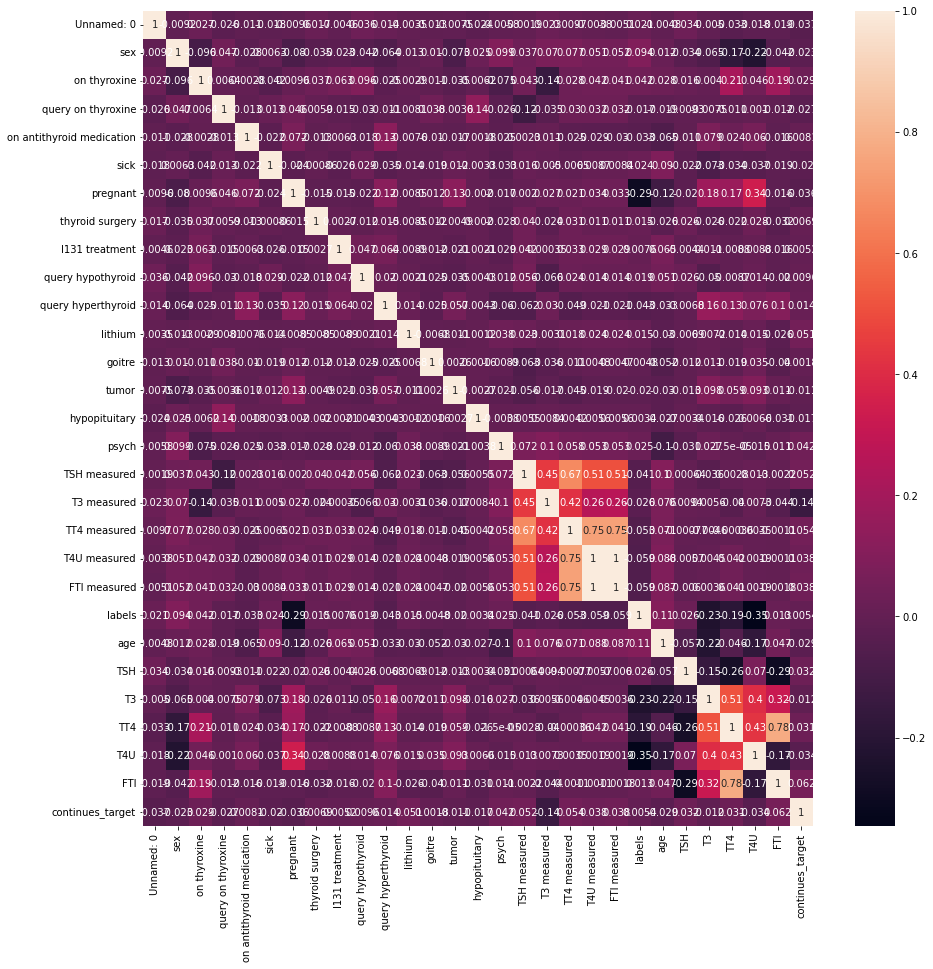

In [40]:
## co-relation before scaling the data
plt.figure(figsize=(15,15))
sns.heatmap(cleaned_data.corr(),annot=True)

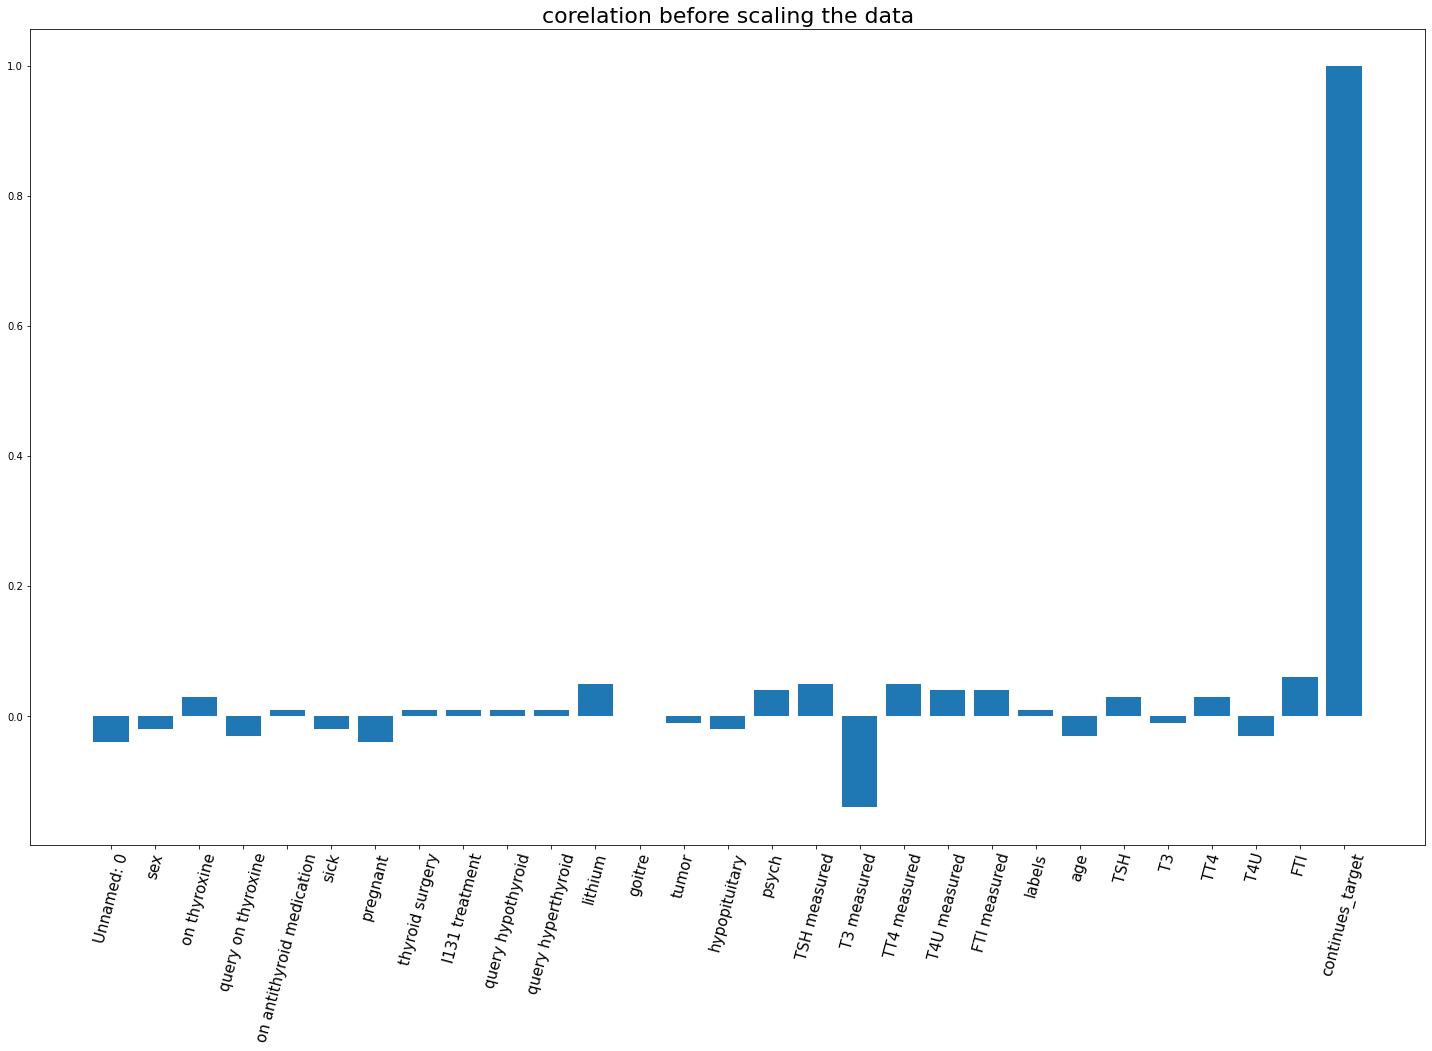

In [52]:
plt.figure(figsize=(25,15))
plt.bar(x = round(cleaned_data.corr()['continues_target'],2).keys(),height=round(cleaned_data.corr()['continues_target'],2).values)
plt.xticks(rotation=75,fontsize=15)
plt.title('corelation before scaling the data',fontdict={'fontsize':22})
plt.show()

In [53]:
# to scaling the numerical features

cleaned_data[num_col] = mm.fit_transform(cleaned_data[num_col])

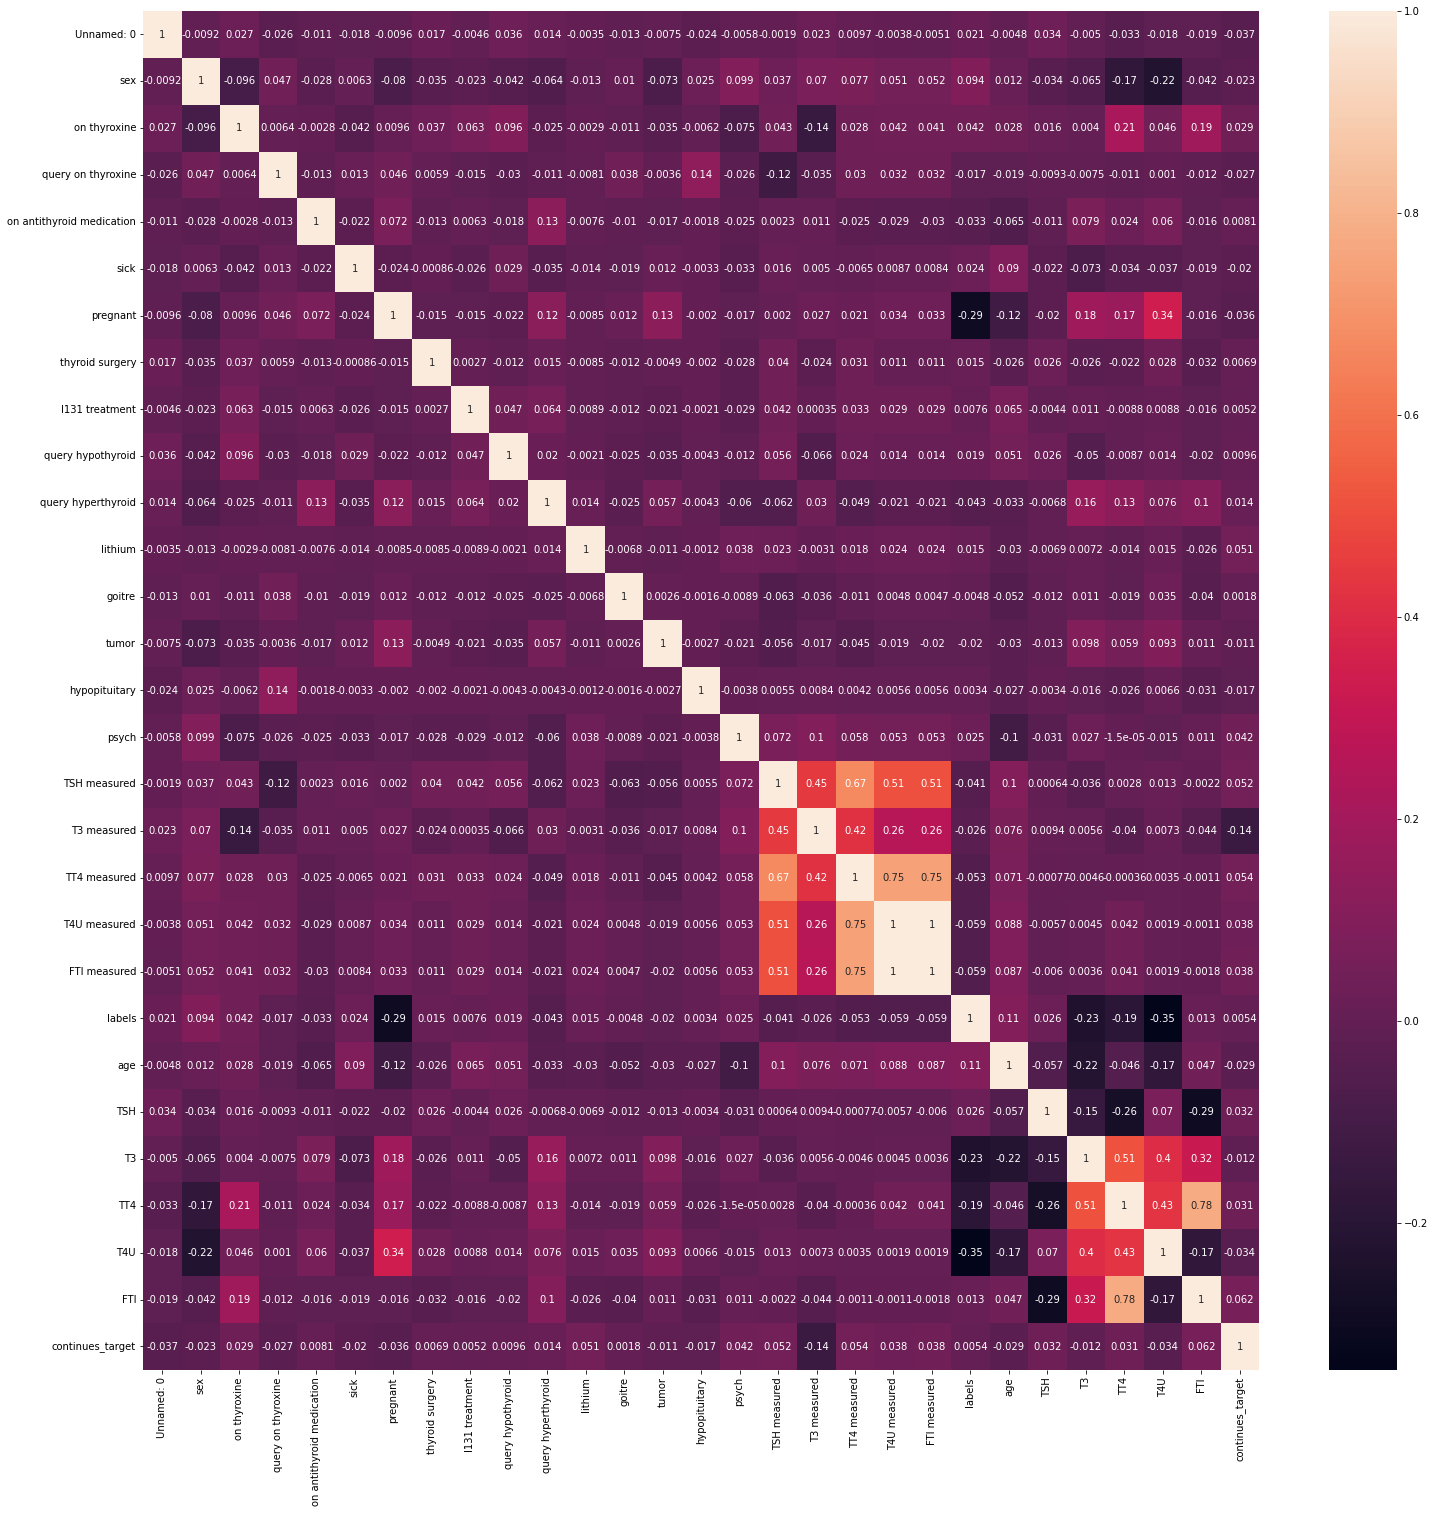

In [54]:
plt.figure(figsize=(25,25))
sns.heatmap(cleaned_data.corr(),annot=True);

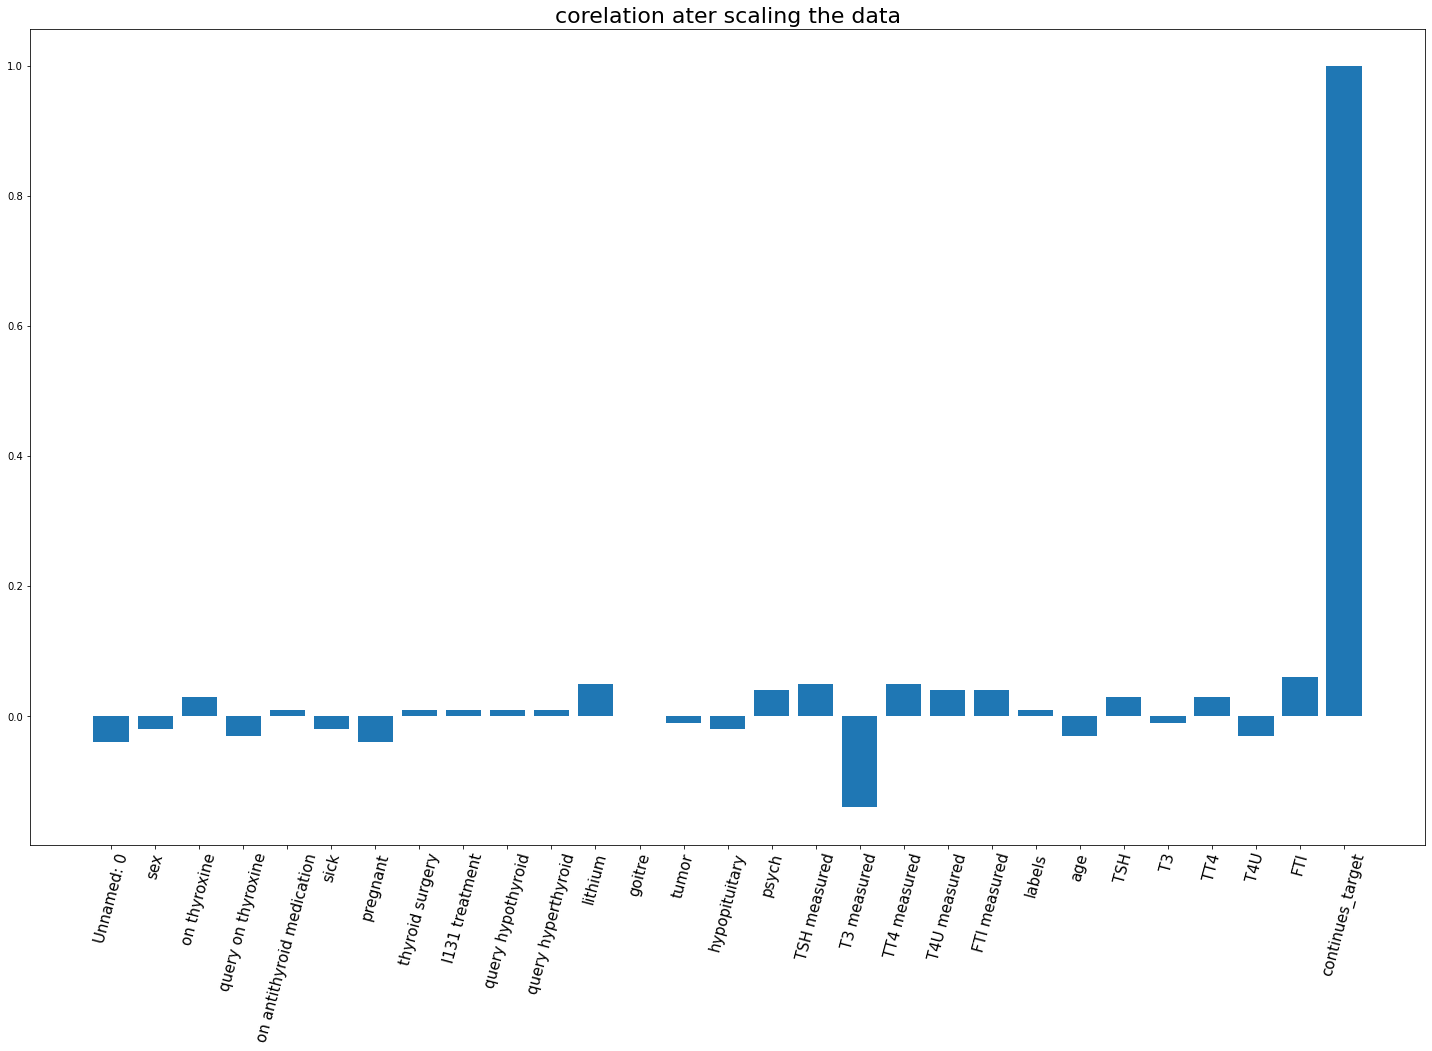

In [55]:
plt.figure(figsize=(25,15))
plt.bar(x = round(cleaned_data.corr()['continues_target'],2).keys(),height=round(cleaned_data.corr()['continues_target'],2).values)
plt.xticks(rotation=75,fontsize=15)
plt.title('corelation ater scaling the data',fontdict={'fontsize':22})
plt.show()

In [80]:
pd.set_option('display.max_columns',None)

In [81]:
cleaned_data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2,0.268293,0.007726,0.184834,0.233645,0.359883,0.276005,1442.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2,0.548780,0.001840,0.186098,0.250000,0.318841,0.300254,2965.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2,0.841463,0.000292,0.175355,0.404206,0.359883,0.276005,806.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0.841463,0.001349,0.109005,0.137850,0.299517,0.173028,2807.0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2,0.207317,0.000047,0.186098,0.422897,0.507246,0.353690,3434.0


In [57]:
# Saving Scalized Method

joblib.dump(mm,'minmax_scaler.scl')

['minmax_scaler.scl']

In [61]:
cleaned_data =  cleaned_data.drop(['Unnamed: 0'],axis=1)
cleaned_data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T4U measured,FTI measured,labels,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0.268293,0.007726,0.184834,0.233645,0.359883,0.276005,1442.0
1,1,0,0,0,0,0,0,0,0,0,...,1,1,2,0.548780,0.001840,0.186098,0.250000,0.318841,0.300254,2965.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0.841463,0.000292,0.175355,0.404206,0.359883,0.276005,806.0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0.841463,0.001349,0.109005,0.137850,0.299517,0.173028,2807.0
4,0,1,0,0,0,0,0,0,0,0,...,1,1,2,0.207317,0.000047,0.186098,0.422897,0.507246,0.353690,3434.0


## Save Scaled Thyroid Data to CSV

In [63]:
cleaned_data.to_csv('Data/scaled_Data.csv',index=False)          # scaled data has been saved

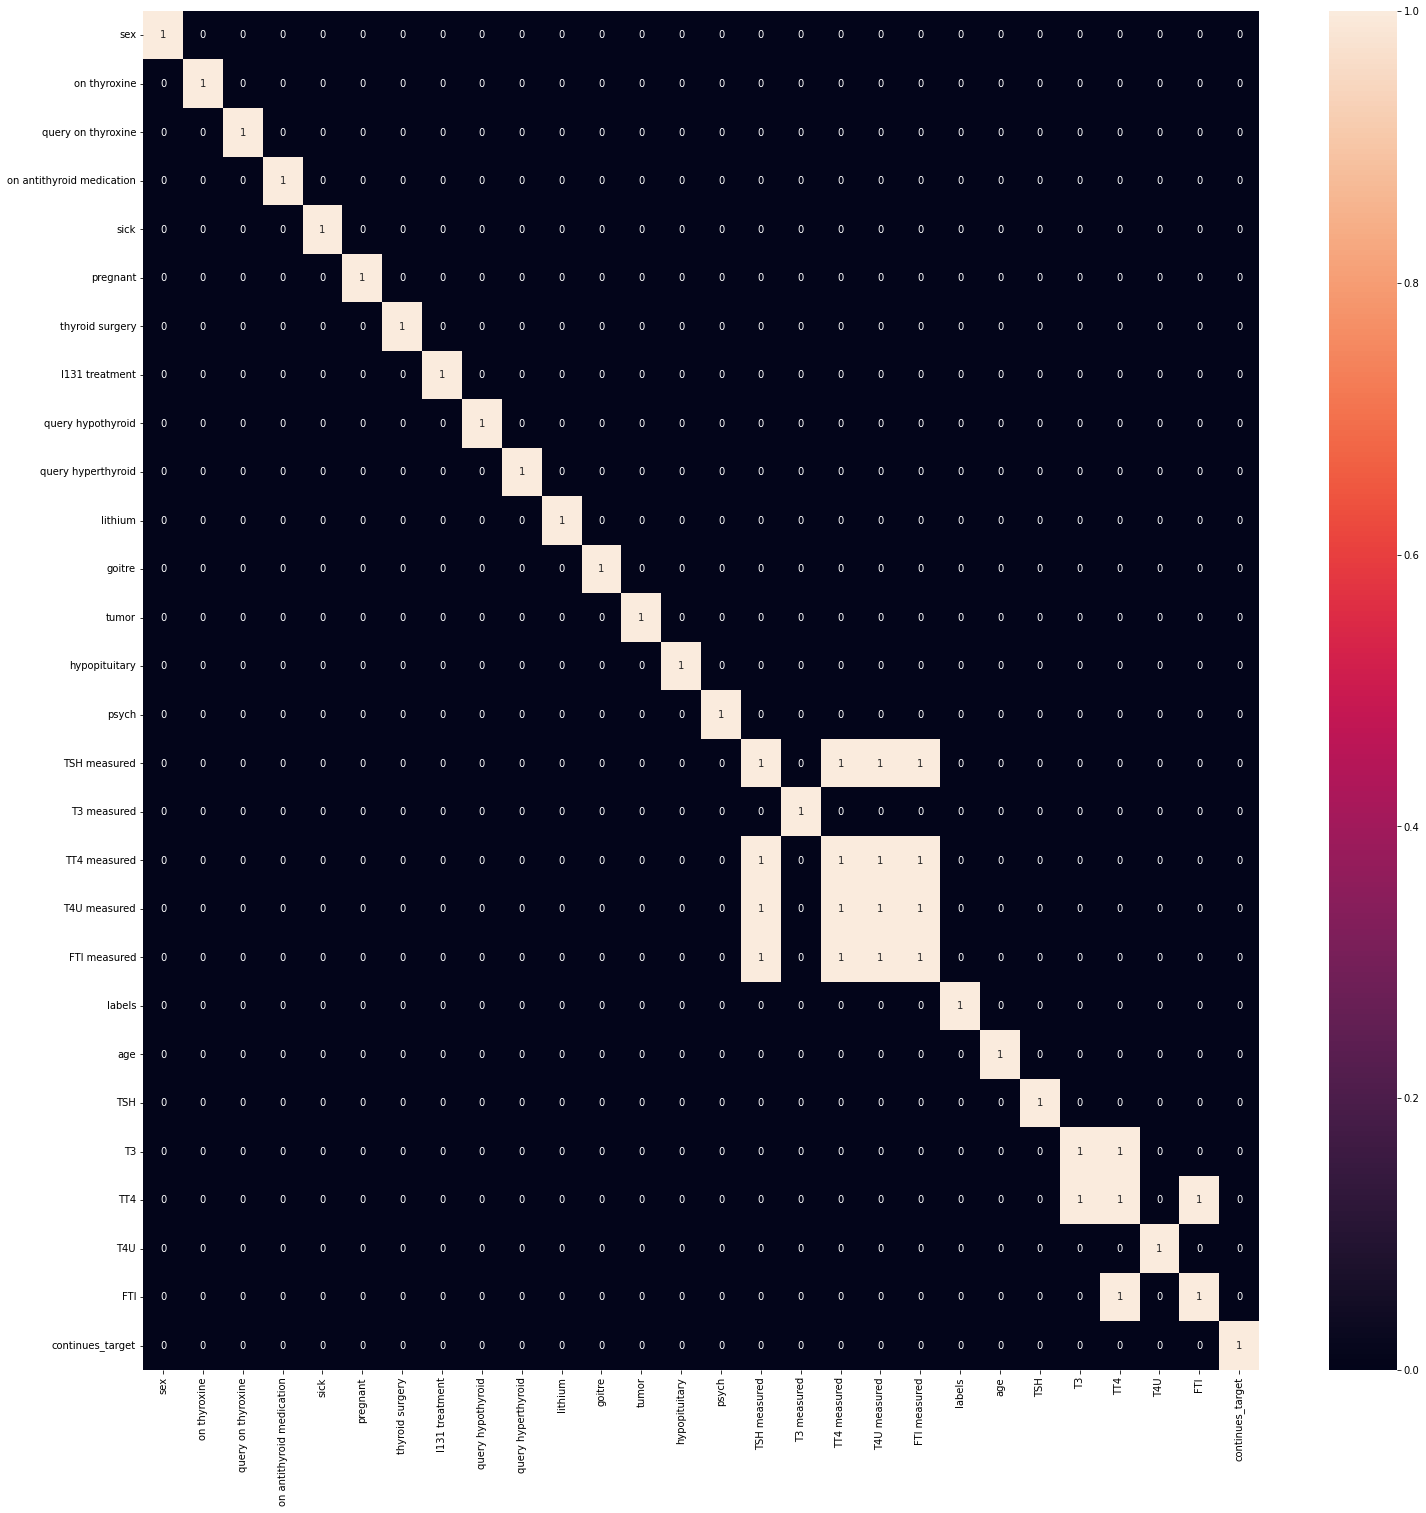

In [64]:
plt.figure(figsize=(25,25))
sns.heatmap(cleaned_data.corr()>0.45,annot=True);

In [83]:
cleaned_data.corr()['labels']

sex                          0.093798
on thyroxine                 0.042466
query on thyroxine          -0.017314
on antithyroid medication   -0.032669
sick                         0.023543
pregnant                    -0.293854
thyroid surgery              0.015141
I131 treatment               0.007604
query hypothyroid            0.019482
query hyperthyroid          -0.042891
lithium                      0.014562
goitre                      -0.004767
tumor                       -0.019520
hypopituitary                0.003424
psych                        0.025470
TSH measured                -0.041249
T3 measured                 -0.025870
TT4 measured                -0.053255
T4U measured                -0.058892
FTI measured                -0.058657
labels                       1.000000
age                          0.106132
TSH                          0.026381
T3                          -0.231007
TT4                         -0.188084
T4U                         -0.345717
FTI         

In [73]:
positive_co_related_col = (cleaned_data.corr()['continues_target'][cleaned_data.corr()['continues_target']>0].keys())
positive_co_related_col

Index(['on thyroxine', 'on antithyroid medication', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'psych', 'TSH measured', 'TT4 measured', 'T4U measured',
       'FTI measured', 'labels', 'TSH', 'TT4', 'FTI', 'continues_target'],
      dtype='object')

In [75]:
positive_co_related_col_by_labels = (cleaned_data.corr()['labels'][cleaned_data.corr()['labels']>0].keys())
positive_co_related_col_by_labels

Index(['sex', 'on thyroxine', 'sick', 'thyroid surgery', 'I131 treatment',
       'query hypothyroid', 'lithium', 'hypopituitary', 'psych', 'labels',
       'age', 'TSH', 'FTI', 'continues_target'],
      dtype='object')

#### intersection between corr of labels and corr of continues target

In [79]:
output = set(positive_co_related_col).intersection(set(positive_co_related_col_by_labels))
output

{'FTI',
 'I131 treatment',
 'TSH',
 'continues_target',
 'labels',
 'lithium',
 'on thyroxine',
 'psych',
 'query hypothyroid',
 'thyroid surgery'}

# Feature Selection

In [85]:
selected = cleaned_data[['age','sex','TSH','TSH measured','pregnant','TT4 measured','T4U measured','FTI','FTI measured','I131 treatment','psych','on thyroxine','sick','labels','continues_target',]]
selected.head()
# feature selection from scaled the data

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,labels,continues_target
0,0.268293,0,0.007726,1,0,1,0,0.276005,0,0,0,0,0,2,1442.0
1,0.548780,1,0.001840,1,0,1,1,0.300254,1,0,0,0,0,2,2965.0
2,0.841463,0,0.000292,1,0,1,0,0.276005,0,0,0,1,0,2,806.0
3,0.841463,0,0.001349,1,0,1,1,0.173028,1,0,0,0,0,2,2807.0
4,0.207317,0,0.000047,1,0,1,1,0.353690,1,0,0,1,0,2,3434.0


### to save final scaled data

In [87]:
selected.to_csv('Data/final_scaled_data.csv',index=False)           # final scaled data saved

In [30]:
without_scaled_data = pd.read_csv('Data/cleaned_data.csv')[['age','sex','TSH','TSH measured','pregnant','TT4 measured','T4U measured','FTI','FTI measured','I131 treatment','psych','on thyroxine','sick','labels','continues_target']]
without_scaled_data.head()

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,labels,continues_target
0,23.0,F,4.10,t,f,t,f,110.470083,f,f,f,f,f,Negative,1442.0
1,46.0,M,0.98,t,f,t,t,120.000000,t,f,f,f,f,Negative,2965.0
2,70.0,F,0.16,t,f,t,f,110.470083,f,f,f,t,f,Negative,806.0
3,70.0,F,0.72,t,f,t,t,70.000000,t,f,f,f,f,Negative,2807.0
4,18.0,F,0.03,t,f,t,t,141.000000,t,f,f,t,f,Negative,3434.0


In [94]:
selected.shape, without_scaled_data.shape

((3682, 15), (3771, 15))

### load labelencoder to labelize without scaled data

In [96]:
label_encoder = joblib.load('Data/label_encoder.lb')

In [102]:
cat_col = list(without_scaled_data.select_dtypes(include="O").columns)
cat_col

['sex',
 'TSH measured',
 'pregnant',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'I131 treatment',
 'psych',
 'on thyroxine',
 'sick',
 'labels']

In [105]:
without_scaled_data[cat_col]=without_scaled_data[cat_col].apply(label_encoder.fit_transform)

## final data without scaling

In [106]:
without_scaled_data.head(20)

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,labels,continues_target
0,23.0,0,4.100000,1,0,1,0,110.470083,0,0,0,0,0,2,1442.0
1,46.0,1,0.980000,1,0,1,1,120.000000,1,0,0,0,0,2,2965.0
2,70.0,0,0.160000,1,0,1,0,110.470083,0,0,0,1,0,2,806.0
3,70.0,0,0.720000,1,0,1,1,70.000000,1,0,0,0,0,2,2807.0
4,18.0,0,0.030000,1,0,1,1,141.000000,1,0,0,1,0,2,3434.0
5,59.0,0,5.087879,0,0,1,1,78.000000,1,0,0,0,0,2,1595.0
6,80.0,0,2.200000,1,0,1,1,115.000000,1,0,0,0,0,2,1367.0
7,66.0,0,0.600000,1,0,1,1,132.000000,1,0,0,0,0,2,1787.0
8,68.0,1,2.400000,1,0,1,1,93.000000,1,0,0,0,0,2,2534.0
9,84.0,0,1.100000,1,0,1,1,121.000000,1,0,0,0,0,2,1485.0


In [111]:
pd.read_csv('Data/cleaned_data.csv').head(20)

,Unnamed: 0,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,labels,age,TSH,T3,TT4,T4U,FTI,continues_target
0,0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative,23.0,4.100000,2.000000,102.0,0.994957,110.470083,1442.0
1,1,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative,46.0,0.980000,2.013338,109.0,0.910000,120.000000,2965.0
2,2,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative,70.0,0.160000,1.900000,175.0,0.994957,110.470083,806.0
3,3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative,70.0,0.720000,1.200000,61.0,0.870000,70.000000,2807.0
4,4,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative,18.0,0.030000,2.013338,183.0,1.300000,141.000000,3434.0
5,5,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,Negative,59.0,5.087879,2.013338,72.0,0.920000,78.000000,1595.0
6,6,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative,80.0,2.200000,0.600000,80.0,0.700000,115.000000,1367.0
7,7,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,t,t,t,t,Negative,66.0,0.600000,2.200000,123.0,0.930000,132.000000,1787.0
8,8,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative,68.0,2.400000,1.600000,83.0,0.890000,93.000000,2534.0
9,9,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,t,t,t,t,Negative,84.0,1.100000,2.200000,115.0,0.950000,121.000000,1485.0


## report
### labels feature
Negative --->   2 <br>
Hypothyroidism ----> 1  <br>
Hyperthyroidism  ----> 0  <br>
### sex feature
Female  ---->   0 <br>
male   ----->   1<br>
### TSH measured
1 --->  t
0--->  f
### pregnant
0 ----> f
1 ----> t
### TT4 meassured
1 ----> t

In [107]:
without_scaled_data['labels'].value_counts()

2    3608
1     149
0      14
Name: labels, dtype: int64

In [109]:
without_scaled_data['sex'].value_counts()

0    2629
1    1142
Name: sex, dtype: int64

In [110]:
without_scaled_data.to_csv('Data/final_without_scaled_data.csv',index=False)

### data has been pre processed with scaled and without scaled